In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/vartika kumari/Desktop/AAIC/heart.csv')

In [3]:
df_all = pd.read_csv('C:/Users/vartika kumari/Desktop/AAIC/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
labels = df.target

In [7]:
df.drop(['target'],axis =1, inplace = True)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


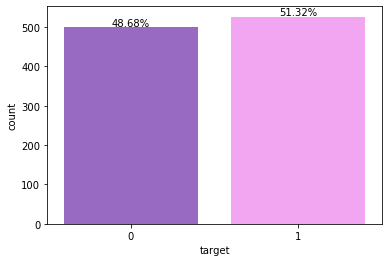

In [9]:
import seaborn as sns
ax=sns.countplot(labels, palette=['#995BD0','#FF99FF'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/len(labels))*100),
            ha="center") 

#### Balanced Data

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

#### No Null values so data is pretty clean

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


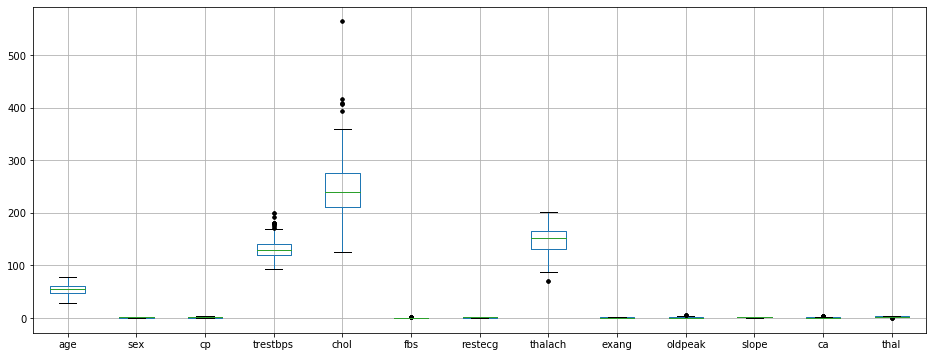

In [12]:
plt.show(df.boxplot(sym='k.', figsize=(16,6)))

#### As we can see that most of the values are very low near 0 so there is chance that these features are categorical features 

## Analysis of Categorical Features

In [13]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [14]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [15]:
df.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [16]:
df.restecg.value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [17]:
df.exang.value_counts()

0    680
1    345
Name: exang, dtype: int64

In [18]:
df.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [19]:
df.ca.value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [20]:
df.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

## Distribution of Age

C:\Users\vartika kumari\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\vartika kumari\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


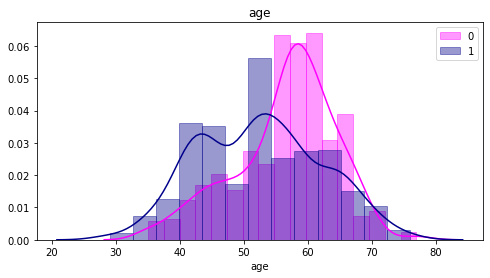

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_all.loc[df_all.target==0, 'age'], ax=ax, label='0',color="magenta", kde=True,hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_all.loc[df_all.target==1, 'age'], ax=ax, label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
ax.set_title('{}'.format('age'))
plt.legend()
plt.show()

#### as we can see people with higher age has high chance of having heart problem

## TestBPS feature analysis

C:\Users\vartika kumari\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\vartika kumari\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


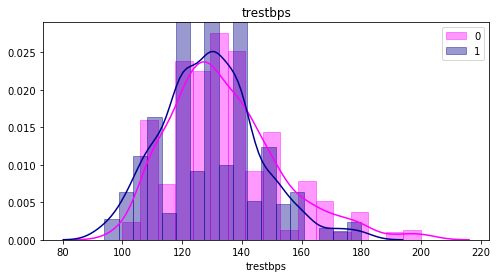

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_all.loc[df_all.target==0, 'trestbps'], ax=ax, label='0',color="magenta", kde=True,hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_all.loc[df_all.target==1, 'trestbps'], ax=ax, label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
ax.set_title('{}'.format('trestbps'))
plt.legend()
plt.show()

C:\Users\vartika kumari\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\vartika kumari\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


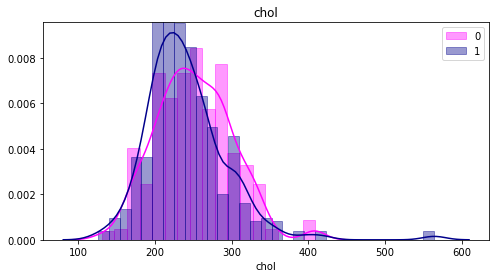

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_all.loc[df_all.target==0, 'chol'], ax=ax, label='0',color="magenta", kde=True,hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_all.loc[df_all.target==1, 'chol'], ax=ax, label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
ax.set_title('{}'.format('chol'))
plt.legend()
plt.show()

# Modelling

## Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.values,labels,test_size=0.30,shuffle=False)

In [25]:
X_train.shape

(717, 13)

In [26]:
X_test.shape

(308, 13)

In [27]:
y_train.shape

(717,)

In [28]:
y_test.shape

(308,)

In [29]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler(with_mean=False)
X_train=sc1.fit_transform(X_train)
X_test=sc1.transform(X_test)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [31]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

In [32]:
import warnings
warnings.filterwarnings('ignore')
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print('Training_accuracy_Score-',model.best_score_)
print('Testing_accuracy_Score-',model.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training_accuracy_Score- 0.8646756021756022
Testing_accuracy_Score- 0.8051948051948052


In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
classifier=LogisticRegression(C=100)
classifier.fit(X_train,y_train)
pred_train=classifier.predict(X_train)
pred_test=classifier.predict(X_test)
accuracy_train=accuracy_score(y_train,pred_train)*100
accuracy_test=accuracy_score(y_test,pred_test)*100
print("Training Accuracy- {}%".format(accuracy_train))
print("Testing Accuracy- {}%".format(accuracy_test))
print("Training Error- {}%".format(100-accuracy_train))
print("Testing Error- {}%".format(100-accuracy_test))

Training Accuracy- 87.58716875871687%
Testing Accuracy- 80.84415584415584%
Training Error- 12.41283124128313%
Testing Error- 19.155844155844164%


In [35]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       154
           1       0.78      0.85      0.82       154

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.81       308



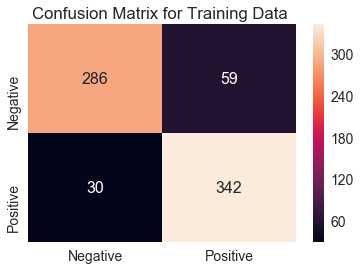

In [36]:
from sklearn.metrics import confusion_matrix,roc_curve
df_cm = pd.DataFrame(confusion_matrix(y_train,pred_train), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix for Training Data ')
plt.show()

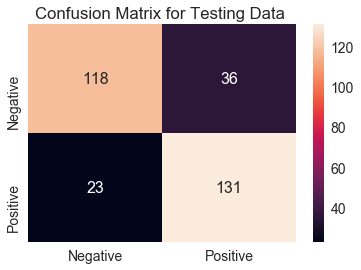

In [37]:
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix for Testing Data ')
plt.show()

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [1, 5, 10, 50, 100, 500, 1000],'min_samples_split':[5, 10, 100, 500]}]
model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'accuracy')
model.fit(X_train, y_train)
print(model.best_estimator_)
print('Training_accuracy_Score-',model.best_score_)
print('Testing_accuracy_Score-',model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training_accuracy_Score- 0.9526223776223777
Testing_accuracy_Score- 0.961038961038961


In [39]:
classifier=model.best_estimator_
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
pred_train=classifier.predict(X_train)
pred_test=classifier.predict(X_test)
accuracy_train=accuracy_score(y_train,pred_train)*100
accuracy_test=accuracy_score(y_test,pred_test)*100
print("Training Accuracy- {}%".format(accuracy_train))
print("Testing Accuracy- {}%".format(accuracy_test))
print("Training Error- {}%".format(100-accuracy_train))
print("Testing Error- {}%".format(100-accuracy_test))

Training Accuracy- 99.86052998605301%
Testing Accuracy- 94.8051948051948%
Training Error- 0.13947001394699043%
Testing Error- 5.194805194805198%


In [41]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       154
           1       0.95      0.94      0.95       154

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



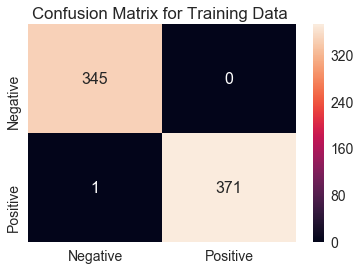

In [42]:
from sklearn.metrics import confusion_matrix,roc_curve
df_cm = pd.DataFrame(confusion_matrix(y_train,pred_train), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix for Training Data ')
plt.show()

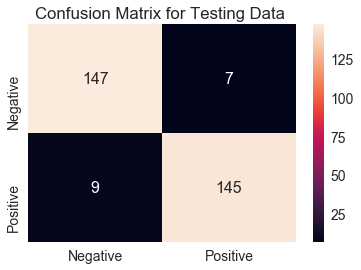

In [43]:
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix for Testing Data ')
plt.show()
